# Entregable 1 (RNN)
Por Carlos Sánchez Polo
Asignatura Deep Learning

## Enunciado:

Aplicación de SimpleRNN a:
1. Dataset IMDB de Keras (https://keras.io/api/datasets/imdb/),
2. Otro Dataset de Keras o TensorFlow (https://keras.io/api/datasets/, https://www.tensorflow.org/datasets/catalog/overviewhl=%20es#all_datasets)

In [ ]:
#!pip install tensorflow

In [20]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence


from keras import models
from keras import layers
from keras.layers import Dropout

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
maxlen = 1000
x_train = sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = sequence.pad_sequences(test_data, maxlen=maxlen)

In [9]:
from keras import regularizers

max_words = 1000
embedding_dim = 32

# Definir el modelo
model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_words))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(x_train,
                    train_labels,
                    epochs=15,
                    batch_size=512,
                    validation_split=0.2)



Epoch 1/15
40/40 [==============================] - 8s 146ms/step - loss: 0.7940 - accuracy: 0.5559 - val_loss: 0.6757 - val_accuracy: 0.6276
Epoch 2/15
40/40 [==============================] - 6s 157ms/step - loss: 0.6052 - accuracy: 0.7541 - val_loss: 0.5388 - val_accuracy: 0.8032
Epoch 3/15
40/40 [==============================] - 5s 119ms/step - loss: 0.4981 - accuracy: 0.8306 - val_loss: 0.4955 - val_accuracy: 0.8138
Epoch 4/15
40/40 [==============================] - 5s 129ms/step - loss: 0.4523 - accuracy: 0.8458 - val_loss: 0.4662 - val_accuracy: 0.8250
Epoch 5/15
40/40 [==============================] - 4s 97ms/step - loss: 0.4262 - accuracy: 0.8520 - val_loss: 0.4310 - val_accuracy: 0.8512
Epoch 6/15
40/40 [==============================] - 4s 88ms/step - loss: 0.4128 - accuracy: 0.8609 - val_loss: 0.4285 - val_accuracy: 0.8462
Epoch 7/15
40/40 [==============================] - 4s 110ms/step - loss: 0.3989 - accuracy: 0.8648 - val_loss: 0.4180 - val_accuracy: 0.8496
Epoch 8/

In [11]:
val_acc_train = history.history['accuracy']
val_acc_test = history.history['val_accuracy']

results = model.evaluate(x_test, test_labels)

782/782 [==============================] - 2s 2ms/step - loss: 0.3986 - accuracy: 0.8575


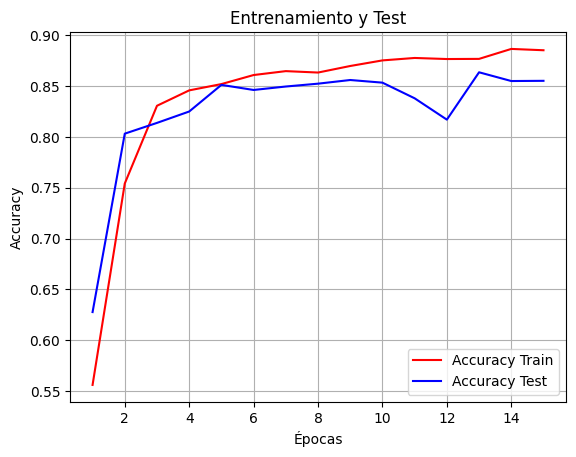

In [12]:
import matplotlib.pyplot as plt


epochs = range(1, len(val_acc_train) + 1)
plt.plot(epochs, val_acc_train, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test, 'b',  label='Accuracy Test')
plt.title('Entrenamiento y Test')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()


## RNN con yelp_review_full_csv (ejecución local)

Saltar a ejecución en la nube. La ejecución en local no está completa por falta de recursos.


In [ ]:
path_train="yelp_review_full_csv/train.csv"
path_test="yelp_review_full_csv/test.csv"

# Cargar el 10% de las filas del archivo train.csv
train_data_2 = pd.read_csv(path_train).sample(frac=0.15, random_state=42)

# Separar características (data) y etiquetas (labels) para train
train_labels_2 = train_data_2.iloc[:, 0]  # La primera columna contiene las etiquetas
train_data_2 = train_data_2.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Cargar el 10% de las filas del archivo test.csv
test_data_2 = pd.read_csv(path_test).sample(frac=0.25, random_state=42)

# Separar características (data) y etiquetas (labels) para test
test_labels_2 = test_data_2.iloc[:, 0]  # La primera columna contiene las etiquetas
test_data_2 = test_data_2.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Verificar el tamaño de las muestras
print("Tamaño del conjunto de entrenamiento (data):", len(train_data_2))
print("Tamaño del conjunto de prueba (data):", len(test_data_2))
print("Tamaño del conjunto de entrenamiento (labels):", len(train_labels_2))
print("Tamaño del conjunto de prueba (labels):", len(test_labels_2))


Tamaño del conjunto de entrenamiento (data): 97500
Tamaño del conjunto de prueba (data): 12500
Tamaño del conjunto de entrenamiento (labels): 97500
Tamaño del conjunto de prueba (labels): 12500


In [ ]:
from keras.utils import to_categorical

# Convertir train_labels_2 a one-hot encoding
train_labels_2_encoded = to_categorical(train_labels_2 - 1)

# Convertir test_labels_2 a one-hot encoding
test_labels_2_encoded = to_categorical(test_labels_2 - 1)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

maxlen_2 = 80
max_num_words= 300
ignore_top_words= 10

# Inicializa un Tokenizer
tokenizer = Tokenizer(num_words=max_num_words)

# Ajusta el Tokenizer a tus datos de entrenamiento
tokenizer.fit_on_texts(train_data_2)

# Get the word counts
word_counts = tokenizer.word_counts

# Sort the word counts and get the 10 most common words
most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:ignore_top_words]
most_common_words = [word for word, count in most_common_words]

# Adjust the word index of the tokenizer
for word in most_common_words:
    del tokenizer.word_index[word]
    del tokenizer.word_docs[word]
    del tokenizer.word_counts[word]

# Now you can convert your texts into sequences
train_data_2_token = tokenizer.texts_to_sequences(train_data_2)
test_data_2_token  = tokenizer.texts_to_sequences(test_data_2)

# Ahora puedes aplicar sequence.pad_sequences
x_train_2 = sequence.pad_sequences(train_data_2_token, maxlen=maxlen_2)
x_test_2 = sequence.pad_sequences(test_data_2_token, maxlen=maxlen_2)

In [ ]:

embedding_dim = 100
num_classes = 5

model_2 = models.Sequential()
model_2.add(layers.Embedding(input_dim=maxlen_2, output_dim=embedding_dim))
model_2.add(layers.SimpleRNN(64, return_sequences=True))
model_2.add(layers.SimpleRNN(32))
model_2.add(layers.Dropout(0.1))
model_2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(layers.Dense(num_classes, activation='softmax'))


# Compilar el modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_2 = model_2.fit(x_train_2,
                        train_labels_2_encoded,
                        epochs=20,
                        batch_size=1024,
                        validation_data=(x_test_2, test_labels_2_encoded))


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 232ms/step - accuracy: 0.2567 - loss: 1.9485 - val_accuracy: 0.3196 - val_loss: 1.6007
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 281ms/step - accuracy: 0.3533 - loss: 1.5372 - val_accuracy: 0.3891 - val_loss: 1.4334
Epoch 3/20
62/96 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.3885 - loss: 1.4265

KeyboardInterrupt: 

In [ ]:

val_acc_train_2 = history_2.history['accuracy']
val_acc_test_2 = history_2.history['val_accuracy']


In [ ]:

results_2 = model_2.evaluate(x_test_2, test_labels_2)



## RNN con yelp_review_full_csv (ejecución en la nube)

In [13]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
!wget https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz

--2024-04-15 21:35:31--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_full_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.124.64, 52.216.56.200, 52.216.49.152, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.124.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196146755 (187M) [application/x-tar]
Saving to: ‘yelp_review_full_csv.tgz’

yelp_review_full_cs 100%[===================>] 187.06M  34.1MB/s    in 5.4s    

2024-04-15 21:35:36 (34.5 MB/s) - ‘yelp_review_full_csv.tgz’ saved [196146755/196146755]



In [15]:
 !tar -xvzf yelp_review_full_csv.tgz

yelp_review_full_csv/
yelp_review_full_csv/train.csv
yelp_review_full_csv/readme.txt
yelp_review_full_csv/test.csv


In [16]:
train_yelp = pd.read_csv('yelp_review_full_csv/train.csv', header=None)
test_yelp  = pd.read_csv('yelp_review_full_csv/test.csv', header=None)
# Mezclar los datos
train_yelp = train_yelp.sample(frac=1).reset_index(drop=True)
test_yelp = test_yelp.sample(frac=1).reset_index(drop=True)

train_yelp.head()
#test_yelp.head()

,0,1
0,1,20 minutes to make a sandwhich and acting like...
1,2,OMFG!!!! this place is a dump!!! i should ...
2,1,Watch out! The bartenders change the price of ...
3,4,I'm addicted to the Canarias! The achta is jus...
4,1,"This place has lousy service, even by K-Mart's..."


In [17]:
# Separar características (data) y etiquetas (labels) para train
train_labels_4 = train_yelp.iloc[:, 0]  # La primera columna contiene las etiquetas
train_data_4 = train_yelp.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Separar características (data) y etiquetas (labels) para test
test_labels_4 = test_yelp.iloc[:, 0]  # La primera columna contiene las etiquetas
test_data_4 = test_yelp.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Verificar el tamaño de las muestras
print("Tamaño del conjunto de entrenamiento (data):", len(train_data_4))
print("Tamaño del conjunto de entrenamiento (labels):", len(train_labels_4))
print("Tamaño del conjunto de prueba (data):", len(test_data_4))
print("Tamaño del conjunto de prueba (labels):", len(test_labels_4))

Tamaño del conjunto de entrenamiento (data): 650000
Tamaño del conjunto de entrenamiento (labels): 650000
Tamaño del conjunto de prueba (data): 50000
Tamaño del conjunto de prueba (labels): 50000


Entre otras cosas, a continuación vamos a reclasificar las reseñas en buenas (1) mediocres (2,3,4) y buenas (5), pasando de 5 a 3 clases. Esto se hacer por motivos de cómputo, pues es una RNN con análisis de sentimientos/sensaciones. Usamos palabras clave de reseñas para determinar que tan bueno es algo, siendo mucho más dificil atinar con 5 que con 3 clases. Al tener recursos limitados simplificamos un poco el proceso.

In [18]:
# Reemplazar las clases 2, 3 y 4 por la nueva clase 2, y la clase 5 por la nueva clase 3
train_labels_4_replaced = train_labels_4.replace({2: 2, 3: 2, 4: 2, 5: 3})
test_labels_4_replaced = test_labels_4.replace({2: 2, 3: 2, 4: 2, 5: 3})


# Convertir train_labels_4_replaced a one-hot encoding
train_labels_4_encoded = to_categorical(train_labels_4_replaced - 1)
# Convertir test_labels_4_replaced a one-hot encoding
test_labels_4_encoded = to_categorical(test_labels_4_replaced - 1)



In [19]:
maxlen_4 = 80
max_num_words= 500
ignore_top_words= 10

# Inicializa un Tokenizer
tokenizer = Tokenizer(num_words=max_num_words)

# Ajusta el Tokenizer a tus datos de entrenamiento
tokenizer.fit_on_texts(train_data_4)

# Get the word counts
word_counts = tokenizer.word_counts

# Sort the word counts and get the 10 most common words
most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:ignore_top_words]
most_common_words = [word for word, count in most_common_words]

# Adjust the word index of the tokenizer
for word in most_common_words:
    del tokenizer.word_index[word]
    del tokenizer.word_docs[word]
    del tokenizer.word_counts[word]

# Now you can convert your texts into sequences
train_data_4_token = tokenizer.texts_to_sequences(train_data_4)
test_data_4_token  = tokenizer.texts_to_sequences(test_data_4)

# Ahora puedes aplicar sequence.pad_sequences
x_train_4 = sequence.pad_sequences(train_data_4_token, maxlen=maxlen_4)
x_test_4 = sequence.pad_sequences(test_data_4_token, maxlen=maxlen_4)

In [22]:
max_words = 500
embedding_dim = 50
num_classes = 3

# Definir el modelo
model_4 = models.Sequential()
model_4.add(layers.Embedding(input_dim=maxlen_4, output_dim=embedding_dim))
model_4.add(layers.SimpleRNN(64))  # Reemplaza Flatten con LSTM
model_4.add(Dropout(0.3))  # Añade Dropout después de LSTM
model_4.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_4.add(Dropout(0.3))
model_4.add(layers.Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model_4.summary()

history_4 = model_4.fit(x_train_4,
                        train_labels_4_encoded,
                        epochs=20,
                        batch_size=16384,
                        validation_data=(x_test_4, test_labels_4_encoded))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 50)          4000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                7360      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 20067 (78.39 KB)
Trainable params: 20067

In [24]:
val_acc_train_4 = history_4.history['accuracy']
val_acc_test_4 = history_4.history['val_accuracy']

results_4 = model_4.evaluate(x_test_4, test_labels_4_encoded)

1563/1563 [==============================] - 14s 9ms/step - loss: 0.7740 - accuracy: 0.6592


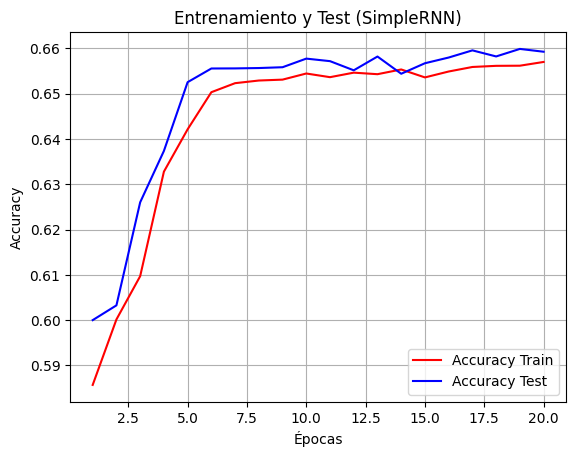

In [26]:
import matplotlib.pyplot as plt
epochs = range(1, len(val_acc_train_4) + 1)
plt.plot(epochs, val_acc_train_4, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test_4,  'b', label='Accuracy Test')
plt.title('Entrenamiento y Test (SimpleRNN)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

Esta es una primera aproximación a los modelos RNN. La precisión es mejorable, pero debido a limitaciones de google collab es lo mejor que puedo ofrecer por el momento